In [20]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from nltk.corpus import stopwords



# Load the dataset
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

# Filter out rows with missing review text
df = df.dropna(subset=['Review Text'])

# Define stopwords
stop_words = set(stopwords.words('english'))

# Define functions for preprocessing and tokenization
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Filter out non-alphanumeric tokens and stopwords
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    return tokens






In [21]:

df['Tokens'] = df['Review Text'].apply(preprocess_text)
print(df['Tokens'])

0        [absolutely, wonderful, silky, sexy, comfortable]
1        [love, dress, sooo, pretty, happened, find, st...
2        [high, hopes, dress, really, wanted, work, ini...
3        [love, love, love, jumpsuit, fun, flirty, fabu...
4        [shirt, flattering, due, adjustable, front, ti...
                               ...                        
23481    [happy, snag, dress, great, price, easy, slip,...
23482    [reminds, maternity, clothes, soft, stretchy, ...
23483    [fit, well, top, see, never, would, worked, gl...
23484    [bought, dress, wedding, summer, cute, unfortu...
23485    [dress, lovely, platinum, feminine, fits, perf...
Name: Tokens, Length: 22641, dtype: object


In [38]:
# Train word embeddings for younger women's reviews
# Filter reviews by age group (e.g., ages 18-25)
younger_reviews = df[df['Age'] >= 18]
younger_reviews = younger_reviews[younger_reviews['Age'] <= 25]
print(younger_reviews.shape)


# Train Word2Vec model for younger women's reviews
younger_model = Word2Vec(younger_reviews['Tokens'], vector_size=100, window=5, min_count=1, workers=4)

print(younger_model)



(1187, 12)
Word2Vec<vocab=3531, vector_size=100, alpha=0.025>


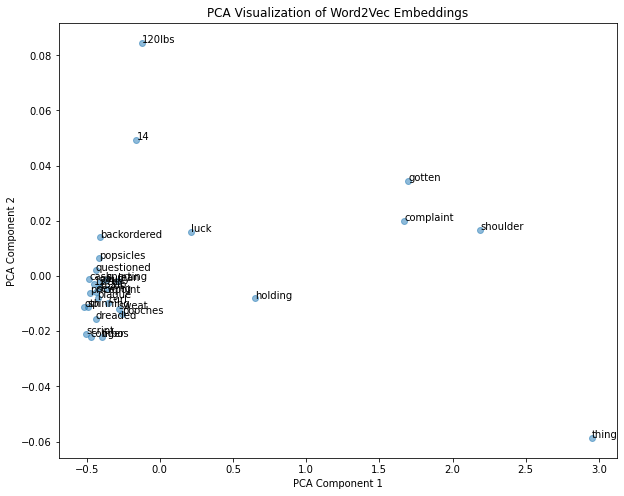

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get word vectors from the Word2Vec model
word_vectors = younger_model.wv

# Extract word vectors and corresponding words
words = list(word_vectors.index_to_key)

# Select a random subset of 30 words
num_words_to_display = 30
selected_words = random.sample(words, num_words_to_display)

# Filter vectors to include only selected words
selected_vectors = [word_vectors[word] for word in selected_words]

# Perform PCA dimensionality reduction
pca = PCA(n_components=2, random_state=42)
embeddings_2d = pca.fit_transform(selected_vectors)

# Plot the embeddings
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], marker='o', alpha=0.5)

# Annotate some words on the plot
for i, word in enumerate(selected_words):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title('PCA Visualization of Word2Vec Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [35]:
# Train word embeddings for older women's reviews
# Filter reviews by age group (e.g., ages 40-60)
older_reviews = df[df['Age'] >= 36]
older_reviews = older_reviews[older_reviews['Age'] <= 50]

# Train Word2Vec model for older women's reviews
older_model = Word2Vec(older_reviews['Tokens'], vector_size=100, window=5, min_count=1, workers=4)

print(older_model)

Word2Vec<vocab=9643, vector_size=100, alpha=0.025>


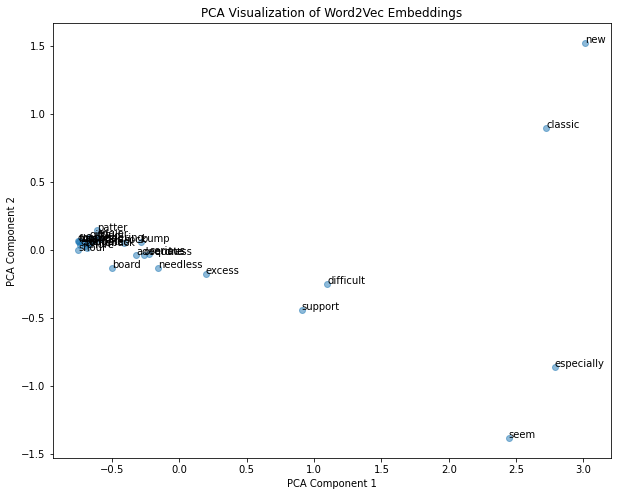

In [36]:
# Get word vectors from the Word2Vec model
word_vectors = older_model.wv

# Extract word vectors and corresponding words
words = list(word_vectors.index_to_key)

# Select a random subset of 30 words
num_words_to_display = 30
selected_words = random.sample(words, num_words_to_display)

# Filter vectors to include only selected words
selected_vectors = [word_vectors[word] for word in selected_words]

# Perform PCA dimensionality reduction
pca = PCA(n_components=2, random_state=42)
embeddings_2d = pca.fit_transform(selected_vectors)

# Plot the embeddings
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], marker='o', alpha=0.5)

# Annotate some words on the plot
for i, word in enumerate(selected_words):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title('PCA Visualization of Word2Vec Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [39]:
# Define thematic dimensions for categorizing words
clothing_categories = ['dress', 'top', 'bottom', 'shoe', 'accessory']
fashion_trends = ['vintage', 'bohemian', 'minimalist', 'athleisure']
descriptive_language = ['stylish', 'comfortable', 'trendy', 'classic']
shopping_experience = ['fitting', 'sale', 'online', 'service']
body_image_and_size = ['body', 'size', 'petite', 'plus']

# Define function to categorize words
def categorize_words(model, words):
    categories = {}
    for category in words:
        category_words = [word for word in words[category] if word in model.wv]
        categories[category] = category_words
    return categories

# Categorize words for each age group
younger_categories = categorize_words(younger_model, {
    'Clothing Categories': clothing_categories,
    'Fashion Trends': fashion_trends,
    'Descriptive Language': descriptive_language,
    'Shopping Experience': shopping_experience,
    'Body Image and Size': body_image_and_size
})

older_categories = categorize_words(older_model, {
    'Clothing Categories': clothing_categories,
    'Fashion Trends': fashion_trends,
    'Descriptive Language': descriptive_language,
    'Shopping Experience': shopping_experience,
    'Body Image and Size': body_image_and_size
})

# Compare word usage between younger and older women's reviews
for category in younger_categories:
    print(f'Category: {category}')
    younger_words = set(younger_categories[category])
    older_words = set(older_categories[category])
    shared_words = younger_words.intersection(older_words)
    print(f'Number of words in younger women\'s reviews: {len(younger_words)}')
    print(f'Number of words in older women\'s reviews: {len(older_words)}')
    print(f'Number of shared words: {len(shared_words)}')
    print('\n')


Category: Clothing Categories
Number of words in younger women's reviews: 4
Number of words in older women's reviews: 5
Number of shared words: 4


Category: Fashion Trends
Number of words in younger women's reviews: 2
Number of words in older women's reviews: 4
Number of shared words: 2


Category: Descriptive Language
Number of words in younger women's reviews: 4
Number of words in older women's reviews: 4
Number of shared words: 4


Category: Shopping Experience
Number of words in younger women's reviews: 4
Number of words in older women's reviews: 4
Number of shared words: 4


Category: Body Image and Size
Number of words in younger women's reviews: 4
Number of words in older women's reviews: 4
Number of shared words: 4




In [42]:
from collections import Counter

# Get all words from older and younger reviews
all_words_older = [word for review in older_reviews['Tokens'] for word in review]
all_words_younger = [word for review in younger_reviews['Tokens'] for word in review]

# Count the frequency of each word in older and younger reviews
word_freq_older = Counter(all_words_older)
word_freq_younger = Counter(all_words_younger)

# Calculate the difference in frequency between older and younger reviews
word_freq_difference = {word: word_freq_older[word] - word_freq_younger.get(word, 0) for word in word_freq_older}

# Sort the words by frequency difference
sorted_words = sorted(word_freq_difference.items(), key=lambda x: x[1], reverse=True)

# Print the sorted words and their frequency differences
for word, diff in sorted_words:
    print(f'Word: {word}, Frequency Difference: {diff}')


Word: dress, Frequency Difference: 3654
Word: love, Frequency Difference: 3396
Word: size, Frequency Difference: 3335
Word: like, Frequency Difference: 2769
Word: fit, Frequency Difference: 2766
Word: top, Frequency Difference: 2754
Word: wear, Frequency Difference: 2365
Word: great, Frequency Difference: 2363
Word: would, Frequency Difference: 1987
Word: 5, Frequency Difference: 1898
Word: color, Frequency Difference: 1883
Word: fabric, Frequency Difference: 1782
Word: small, Frequency Difference: 1631
Word: look, Frequency Difference: 1602
Word: ordered, Frequency Difference: 1457
Word: really, Frequency Difference: 1437
Word: one, Frequency Difference: 1398
Word: little, Frequency Difference: 1382
Word: perfect, Frequency Difference: 1341
Word: flattering, Frequency Difference: 1337
Word: soft, Frequency Difference: 1334
Word: nice, Frequency Difference: 1258
Word: back, Frequency Difference: 1220
Word: well, Frequency Difference: 1202
Word: cute, Frequency Difference: 1145
Word: bi

Word: doesnt, Frequency Difference: 6
Word: potatoes, Frequency Difference: 6
Word: inconsistent, Frequency Difference: 6
Word: annoying, Frequency Difference: 6
Word: kidding, Frequency Difference: 6
Word: poplin, Frequency Difference: 6
Word: coz, Frequency Difference: 6
Word: states, Frequency Difference: 6
Word: sunny, Frequency Difference: 6
Word: cutout, Frequency Difference: 6
Word: upside, Frequency Difference: 6
Word: reg, Frequency Difference: 6
Word: starts, Frequency Difference: 6
Word: sooooo, Frequency Difference: 6
Word: exposing, Frequency Difference: 6
Word: tube, Frequency Difference: 6
Word: dramatic, Frequency Difference: 6
Word: tweed, Frequency Difference: 6
Word: closures, Frequency Difference: 6
Word: restroom, Frequency Difference: 6
Word: ensemble, Frequency Difference: 6
Word: panties, Frequency Difference: 6
Word: hugged, Frequency Difference: 6
Word: deletta, Frequency Difference: 6
Word: 123, Frequency Difference: 6
Word: pieced, Frequency Difference: 6
Wo

Word: soeurs, Frequency Difference: 2
Word: alexandria, Frequency Difference: 2
Word: unsightly, Frequency Difference: 2
Word: resistance, Frequency Difference: 2
Word: expands, Frequency Difference: 2
Word: repeated, Frequency Difference: 2
Word: inserts, Frequency Difference: 2
Word: cardy, Frequency Difference: 2
Word: seasonal, Frequency Difference: 2
Word: gosh, Frequency Difference: 2
Word: angled, Frequency Difference: 2
Word: map, Frequency Difference: 2
Word: summertime, Frequency Difference: 2
Word: orangish, Frequency Difference: 2
Word: thre, Frequency Difference: 2
Word: femine, Frequency Difference: 2
Word: regulat, Frequency Difference: 2
Word: lawn, Frequency Difference: 2
Word: mui, Frequency Difference: 2
Word: belled, Frequency Difference: 2
Word: folks, Frequency Difference: 2
Word: dismay, Frequency Difference: 2
Word: panic, Frequency Difference: 2
Word: surely, Frequency Difference: 2
Word: stadium, Frequency Difference: 2
Word: shou, Frequency Difference: 2
Word

Word: marian, Frequency Difference: 1
Word: ace, Frequency Difference: 1
Word: bandage, Frequency Difference: 1
Word: dolor, Frequency Difference: 1
Word: defines, Frequency Difference: 1
Word: handling, Frequency Difference: 1
Word: 30s, Frequency Difference: 1
Word: tattoos, Frequency Difference: 1
Word: poking, Frequency Difference: 1
Word: sequin, Frequency Difference: 1
Word: tic, Frequency Difference: 1
Word: embedded, Frequency Difference: 1
Word: strides, Frequency Difference: 1
Word: greater, Frequency Difference: 1
Word: kicked, Frequency Difference: 1
Word: silks, Frequency Difference: 1
Word: hacking, Frequency Difference: 1
Word: panky, Frequency Difference: 1
Word: extravagant, Frequency Difference: 1
Word: spun, Frequency Difference: 1
Word: pho, Frequency Difference: 1
Word: herringbone, Frequency Difference: 1
Word: anticipating, Frequency Difference: 1
Word: consideration, Frequency Difference: 1
Word: matchy, Frequency Difference: 1
Word: chase, Frequency Difference:

In [64]:
import pandas as pd
from collections import Counter
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Load the dataset
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

# Filter out rows with missing review text
df = df.dropna(subset=['Review Text'])

# Tokenize and preprocess review text
stop_words = set(stopwords.words('english'))
df['Tokens'] = df['Review Text'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalnum() and word not in stop_words])

# Filter reviews by age group (e.g., ages 18-25 and ages 40-60)
younger_reviews = df[(df['Age'] >= 18) & (df['Age'] <= 25)].head(1000)
print(younger_reviews.shape)
older_reviews = df[(df['Age'] >= 57) & (df['Age'] <= 65)].head(1000)

# Train Word2Vec models for younger and older reviews
younger_model = Word2Vec(younger_reviews['Tokens'], vector_size=100, window=5, min_count=1, workers=4)
older_model = Word2Vec(older_reviews['Tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Get high-frequency words from each embedding space
frequency_threshold = 100  # Adjust as needed based on your dataset and preferences
younger_word_freq = Counter([word for review in younger_reviews['Tokens'] for word in review])
older_word_freq = Counter([word for review in older_reviews['Tokens'] for word in review])
younger_high_frequency_words = [word for word, freq in younger_word_freq.items() if freq >= frequency_threshold]
older_high_frequency_words = [word for word, freq in older_word_freq.items() if freq >= frequency_threshold]


spec_words = ['dress', 'top', 'bottom', 'shoe', 'accessory', 'vintage', 'bohemian', 'minimalist', 'athleisure','stylish', 'comfortable', 'trendy', 'classic', 'sexy', 'hot', 'snatched', 'business', 'professional', 'formal']
# Compare the usage of high-frequency words between younger and older embedding spaces
common_high_frequency_words = set(younger_high_frequency_words) & set(older_high_frequency_words)
for word in spec_words:
    younger_word_count = sum(1 for review in younger_reviews['Tokens'] for w in review if w == word)
    older_word_count = sum(1 for review in older_reviews['Tokens'] for w in review if w == word)
    print(f'Word: {word}, Frequency in Younger Reviews: {younger_word_count}, Frequency in Older Reviews: {older_word_count}')


(1000, 12)
Word: dress, Frequency in Younger Reviews: 612, Frequency in Older Reviews: 358
Word: top, Frequency in Younger Reviews: 303, Frequency in Older Reviews: 323
Word: bottom, Frequency in Younger Reviews: 44, Frequency in Older Reviews: 44
Word: shoe, Frequency in Younger Reviews: 2, Frequency in Older Reviews: 1
Word: accessory, Frequency in Younger Reviews: 0, Frequency in Older Reviews: 0
Word: vintage, Frequency in Younger Reviews: 5, Frequency in Older Reviews: 1
Word: bohemian, Frequency in Younger Reviews: 2, Frequency in Older Reviews: 3
Word: minimalist, Frequency in Younger Reviews: 0, Frequency in Older Reviews: 0
Word: athleisure, Frequency in Younger Reviews: 0, Frequency in Older Reviews: 0
Word: stylish, Frequency in Younger Reviews: 6, Frequency in Older Reviews: 18
Word: comfortable, Frequency in Younger Reviews: 148, Frequency in Older Reviews: 139
Word: trendy, Frequency in Younger Reviews: 1, Frequency in Older Reviews: 1
Word: classic, Frequency in Younger 

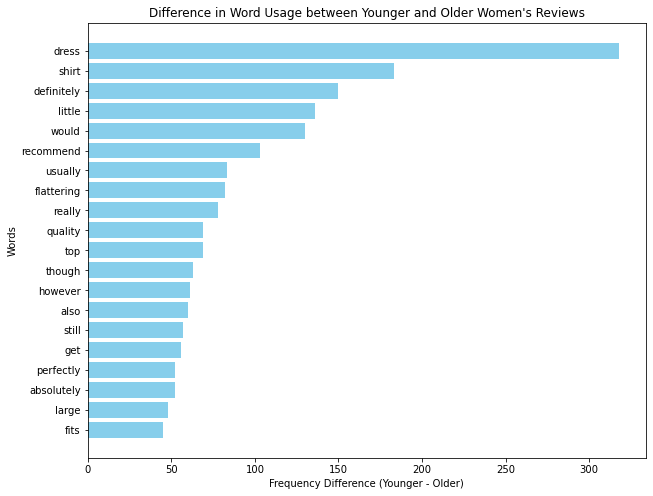

In [53]:


# Compare the usage of high-frequency words between younger and older embedding spaces
common_high_frequency_words = set(younger_high_frequency_words) & set(older_high_frequency_words)
word_freq_diff = {word: younger_word_freq[word] - older_word_freq[word] for word in common_high_frequency_words}

# Sort words by frequency difference
sorted_words = sorted(word_freq_diff.items(), key=lambda x: x[1], reverse=True)

# Prepare data for visualization
words = [word for word, _ in sorted_words]
freq_diff = [diff for _, diff in sorted_words]

# Plot the difference in word usage
plt.figure(figsize=(10, 8))
plt.barh(words[:20], freq_diff[:20], color='skyblue')
plt.xlabel('Frequency Difference (Younger - Older)')
plt.ylabel('Words')
plt.title('Difference in Word Usage between Younger and Older Women\'s Reviews')
plt.gca().invert_yaxis()  # Invert y-axis to display highest frequency difference at the top
plt.show()


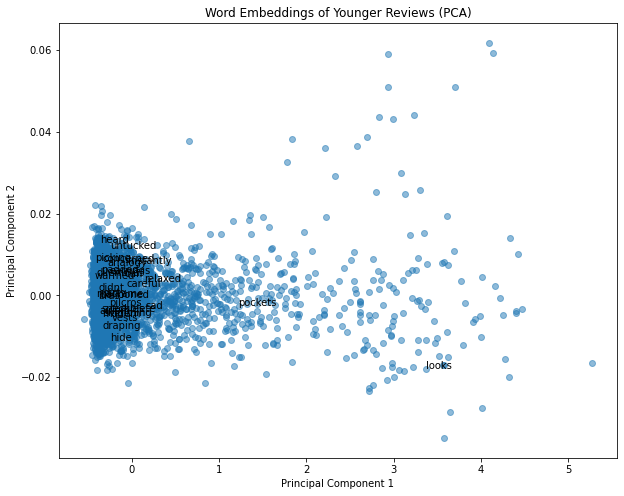

In [57]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np

# Load the dataset
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

# Filter out rows with missing review text and age
df = df.dropna(subset=['Review Text', 'Age'])

# Filter reviews by age group (18-25)
younger_reviews = df[(df['Age'] >= 18) & (df['Age'] <= 25)]

# Tokenize and preprocess review text
stop_words = set(stopwords.words('english'))
sentences = [word_tokenize(review.lower()) for review in younger_reviews['Review Text'] if review]
sentences = [[word for word in sentence if word.isalnum() and word not in stop_words] for sentence in sentences]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Extract word vectors and corresponding words
word_vectors = model.wv
words = list(word_vectors.index_to_key)
vectors = word_vectors.vectors

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Plot the word embeddings
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='o', alpha=0.5)

random_indices = random.sample(range(len(words)), 30)

# Annotate the selected random words on the plot
for i in random_indices:
    plt.annotate(words[i], (vectors_2d[i, 0], vectors_2d[i, 1]))

plt.title('Word Embeddings of Younger Reviews (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


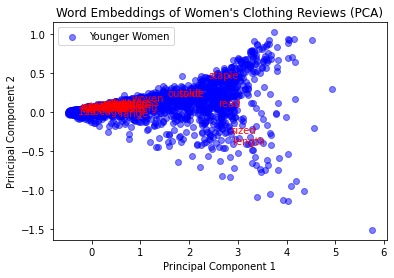

In [60]:
# Filter reviews by age group (40-60)
older_reviews = df[(df['Age'] >= 40) & (df['Age'] <= 60)]

# Tokenize and preprocess review text for older women
older_sentences = [word_tokenize(review.lower()) for review in older_reviews['Review Text'] if review]
older_sentences = [[word for word in sentence if word.isalnum() and word not in stop_words] for sentence in older_sentences]

# Train Word2Vec model for older women
older_model = Word2Vec(older_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Extract word vectors and corresponding words for older women
older_word_vectors = older_model.wv
older_words = list(older_word_vectors.index_to_key)
older_vectors = older_word_vectors.vectors

# Apply PCA to reduce dimensionality for older women
older_vectors_2d = pca.transform(older_vectors)

# Plot the word embeddings for older women on the same plot
plt.scatter(older_vectors_2d[:, 0], older_vectors_2d[:, 1], marker='o', alpha=0.5, color='blue')

# Annotate some words for older women on the plot
for i in random_indices:
    plt.annotate(older_words[i], (older_vectors_2d[i, 0], older_vectors_2d[i, 1]), color='red')

plt.title('Word Embeddings of Women\'s Clothing Reviews (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(['Younger Women', 'Older Women'])
plt.show()


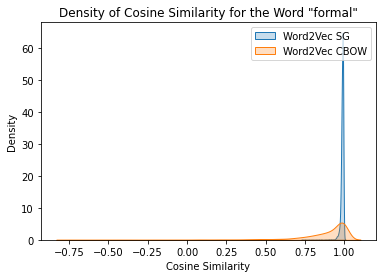

In [63]:
import seaborn as sns

# Define the word "formal"
target_word = "dress"

model_sg = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)  # Skip-Gram model
model_cbow = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)  # CBOW model

# Filter embeddings for the target word
sg_embeddings = model_sg.wv.get_vector(target_word)
cbow_embeddings = model_cbow.wv.get_vector(target_word)

# Calculate cosine similarity of the target word with all other words
sg_cos_similarities = model_sg.wv.cosine_similarities(sg_embeddings, model_sg.wv.vectors)
cbow_cos_similarities = model_cbow.wv.cosine_similarities(cbow_embeddings, model_cbow.wv.vectors)

# Create density plots
sns.kdeplot(sg_cos_similarities, label='Word2Vec SG', shade=True)
sns.kdeplot(cbow_cos_similarities, label='Word2Vec CBOW', shade=True)

# Set plot labels and title
plt.xlabel('Cosine Similarity')
plt.ylabel('Density')
plt.title('Density of Cosine Similarity for the Word "formal"')
plt.legend()

# Show the plot
plt.show()


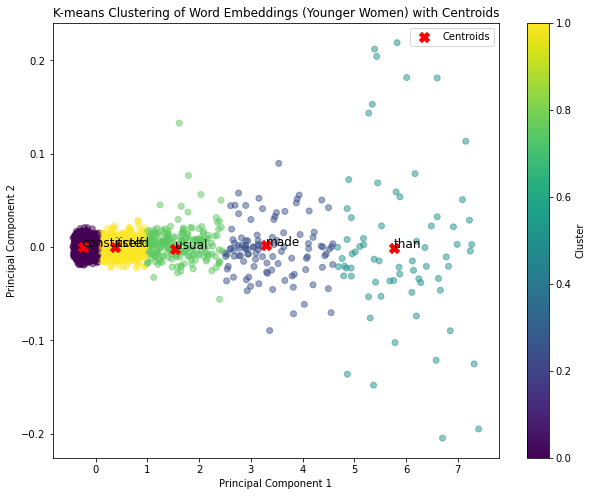

In [69]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

# Filter out rows with missing review text and age
df = df.dropna(subset=['Review Text', 'Age'])

# Filter reviews by age group (18-25)
younger_reviews = df[(df['Age'] >= 18) & (df['Age'] <= 25)]

# Tokenize and preprocess review text
sentences = [review.lower().split() for review in younger_reviews['Review Text']]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get word vectors and words
word_vectors = model.wv
words = list(word_vectors.index_to_key)
vectors = word_vectors.vectors

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)  # You can adjust the number of clusters
clusters = kmeans.fit_predict(vectors)

# Get centroid coordinates
# Initialize an empty list to store centroid words
centroid_words = []

# Get the most representative words for each cluster (closest to centroid)
for centroid in centroids:
    # Calculate the Euclidean distance between each word vector and the centroid
    distances = ((vectors - centroid) ** 2).sum(axis=1)
    # Find the index of the closest word to the centroid
    closest_index = distances.argmin()
    # Get the word corresponding to the index and append to the list
    centroid_words.append(words[closest_index])

# Visualize clusters with centroids and annotated centroid words
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='X', c='red', s=100, label='Centroids')
for i, centroid_word in enumerate(centroid_words):
    plt.annotate(centroid_word, (centroids_2d[i, 0], centroids_2d[i, 1]), fontsize=12)
plt.title('K-means Clustering of Word Embeddings (Younger Women) with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


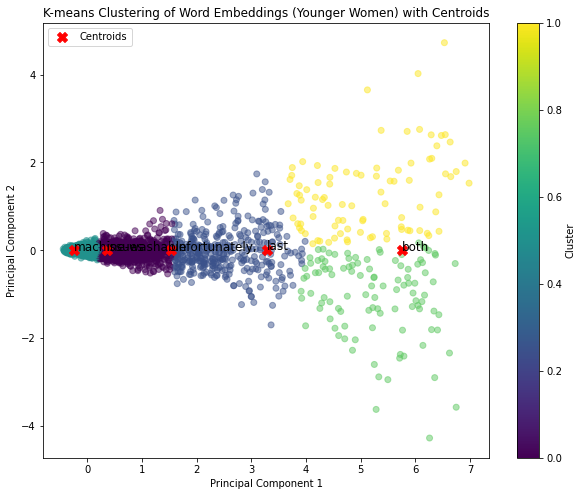

In [68]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

# Filter out rows with missing review text and age
df = df.dropna(subset=['Review Text', 'Age'])

# Filter reviews by age group (18-25)
younger_reviews = df[(df['Age'] >= 55) & (df['Age'] <= 65)]

# Tokenize and preprocess review text
sentences = [review.lower().split() for review in younger_reviews['Review Text']]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get word vectors and words
word_vectors = model.wv
words = list(word_vectors.index_to_key)
vectors = word_vectors.vectors

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)  # You can adjust the number of clusters
clusters = kmeans.fit_predict(vectors)

# Get centroid coordinates
# Initialize an empty list to store centroid words
centroid_words = []

# Get the most representative words for each cluster (closest to centroid)
for centroid in centroids:
    # Calculate the Euclidean distance between each word vector and the centroid
    distances = ((vectors - centroid) ** 2).sum(axis=1)
    # Find the index of the closest word to the centroid
    closest_index = distances.argmin()
    # Get the word corresponding to the index and append to the list
    centroid_words.append(words[closest_index])

# Visualize clusters with centroids and annotated centroid words
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='X', c='red', s=100, label='Centroids')
for i, centroid_word in enumerate(centroid_words):
    plt.annotate(centroid_word, (centroids_2d[i, 0], centroids_2d[i, 1]), fontsize=12)
plt.title('K-means Clustering of Word Embeddings (Younger Women) with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


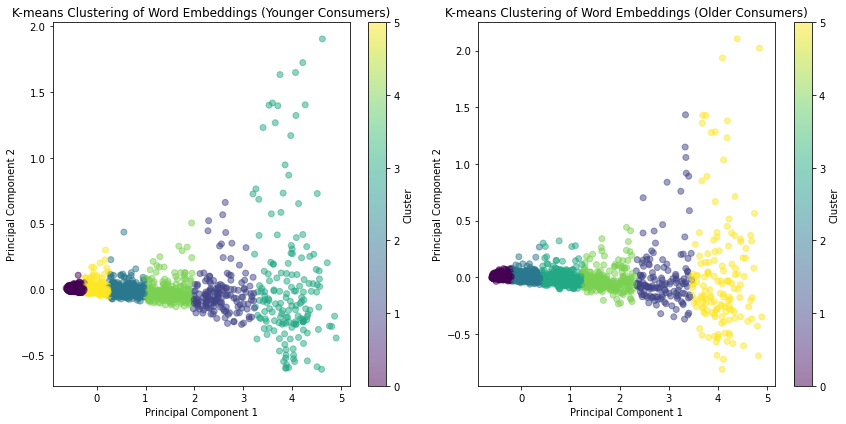

In [93]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

# Filter out rows with missing review text
df = df.dropna(subset=['Review Text'])

# Define stopwords
stop_words = set(stopwords.words('english'))

# Define functions for preprocessing and tokenization
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Filter out non-alphanumeric tokens and stopwords
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    return tokens

df['Tokens'] = df['Review Text'].apply(preprocess_text)


# Divide the dataset into two age groups: younger (18-25) and older (40-60) consumers
younger_reviews = df[(df['Age'] >= 18) & (df['Age'] <= 30)].head(3000)
older_reviews = df[(df['Age'] >= 40) & (df['Age'] <= 60)].head(3000)



# Train Word2Vec embeddings for younger and older consumers
younger_model = Word2Vec(younger_reviews['Tokens'], vector_size=100, window=5, min_count=1, workers=4)
older_model = Word2Vec(older_reviews['Tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Get word vectors and words for younger and older embeddings
younger_word_vectors = younger_model.wv
younger_words = list(younger_word_vectors.index_to_key)
younger_vectors = younger_word_vectors.vectors

older_word_vectors = older_model.wv
older_words = list(older_word_vectors.index_to_key)
older_vectors = older_word_vectors.vectors

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)

# Transform word vectors to 2D using PCA for both age groups
younger_vectors_2d = pca.fit_transform(younger_vectors)
older_vectors_2d = pca.fit_transform(older_vectors)

# Perform K-means clustering for both age groups
kmeans = KMeans(n_clusters=6)

# Cluster younger and older word vectors separately
younger_clusters = kmeans.fit_predict(younger_vectors)
older_clusters = kmeans.fit_predict(older_vectors)

# Visualize clusters for younger consumers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(younger_vectors_2d[:, 0], younger_vectors_2d[:, 1], c=younger_clusters, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering of Word Embeddings (Younger Consumers)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')

# Visualize clusters for older consumers
plt.subplot(1, 2, 2)
plt.scatter(older_vectors_2d[:, 0], older_vectors_2d[:, 1], c=older_clusters, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering of Word Embeddings (Older Consumers)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()


In [91]:
# Perform K-means clustering for both age groups
kmeans_younger = KMeans(n_clusters=5)
kmeans_older = KMeans(n_clusters=5)

# Cluster word vectors for younger and older consumers separately
younger_clusters = kmeans_younger.fit_predict(younger_vectors)
older_clusters = kmeans_older.fit_predict(older_vectors)

# Define a function to get words within each cluster
def get_cluster_words(model, clusters):
    cluster_words = {}
    for i in range(len(clusters)):
        cluster_label = clusters[i]
        word = model.index_to_key[i]
        if cluster_label not in cluster_words:
            cluster_words[cluster_label] = []
        cluster_words[cluster_label].append(word)
    return cluster_words

# Get cluster words for younger and older consumers
younger_cluster_words = get_cluster_words(younger_word_vectors, younger_clusters)
older_cluster_words = get_cluster_words(older_word_vectors, older_clusters)

# Print cluster words for younger consumers
print("Cluster words for younger consumers:")
for label, words in younger_cluster_words.items():
    print(f"Cluster {label}: {', '.join(words)}")

# Print cluster words for older consumers
print("\nCluster words for older consumers:")
for label, words in older_cluster_words.items():
    print(f"Cluster {label}: {', '.join(words)}")


Cluster words for younger consumers:
Cluster 3: the, and, it, is, this, in, but, of, was, on, so, dress, that, love, very, not, are, it's, like, as, fit, top, just, too, really, little, great, they, at, more, fabric, because, me, than, look, these, perfect, fits, bit, color, out, looks, one, shirt, which, also, much, cute, material, has, -, all, from, flattering, about, other, soft, well, nice, only, still, beautiful, back, super, quality, comfortable, were, pretty, loved, long, waist, me., dress., good, does, length, skirt, there, sweater, made, no, way, feel, how, right, did, some, cut, colors, looked, pants, enough, however,, absolutely, sleeves, black, over, design, big, i've, first, front, many, makes, around, white, what, its, blue, both, being, make, high, wore, while, doesn't, worth, light, quite, slightly, by, off, without, two
Cluster 2: i, a, to, for, with, my, have, be, size, wear, am, i'm, would, or, you, up, if, an, ordered, can, had, small, bought, when, will, it., got, 

In [94]:
# Get the numerical representation of "formal" in the younger vector space
formal_younger = younger_model.wv['dress']

# Get the numerical representation of "formal" in the older vector space
formal_older = older_model.wv['dress']

print("Numerical representation of 'dress' in the younger vector space:")
print(formal_younger)

print("\nNumerical representation of 'dress' in the older vector space:")
print(formal_older)


Numerical representation of 'dress' in the younger vector space:
[-2.4247830e-01  5.6396145e-01  8.7765627e-02 -4.3238673e-02
 -7.1640308e-05 -1.0556785e+00  5.2572286e-01  1.2515802e+00
 -6.6736710e-01 -5.4680192e-01 -4.8285794e-01 -8.8836700e-01
 -1.6167644e-01  1.2729627e-01  3.7009820e-01 -3.5226554e-01
  2.4695216e-02 -8.4599864e-01 -1.6678968e-01 -1.2298317e+00
  1.4557371e-01  4.2265680e-01  3.5402948e-01 -2.7700564e-01
  1.8768797e-02  5.3533010e-02 -3.3425727e-01 -5.4379380e-01
 -5.5875200e-01  1.4205562e-01  6.6556495e-01  1.4534698e-01
  2.5995988e-01 -2.5855592e-01 -3.0773762e-01  8.6437052e-01
  1.3238788e-01 -5.8949643e-01 -5.2083951e-01 -1.2824152e+00
 -8.4758559e-03 -5.9679455e-01 -1.9680917e-01  2.0965056e-01
  6.8702412e-01 -1.9989157e-02 -5.0684422e-01 -2.1386416e-01
  3.2234839e-01  4.3904838e-01  3.3362916e-01 -5.5576915e-01
 -1.7296378e-01 -2.1564575e-01 -5.1105207e-01  4.4732854e-01
  4.5013192e-01 -8.2498230e-02 -6.8994343e-01  3.0121589e-01
  1.5817475e-01  2.1

In [99]:
import numpy as np

# Define a function to find words in the neighbourhood of a target word
def find_neighbourhood(model, target_word, topn=10):
    # Get the vector representation of the target word
    target_vector = model.wv[target_word]
    
    # Calculate cosine similarity between the target word and all other words in the vocabulary
    cosine_similarities = model.wv.cosine_similarities(target_vector, model.wv.vectors)
    
    # Sort the words by cosine similarity in descending order
    most_similar_indices = np.argsort(cosine_similarities)[::-1]
    
    # Get the top words in the neighbourhood (excluding the target word itself)
    neighbourhood_words = [model.wv.index_to_key[idx] for idx in most_similar_indices[:topn+1] if model.wv.index_to_key[idx] != target_word]
    
    return neighbourhood_words

# Define a list of fashion-related terms
# fashion_terms = ['dress', 'shirt', 'pants', 'shoes', 'accessories', 'jacket', 'skirt', 'blouse', 'heels']
fashion_terms = ['hot']
# Analyze neighbourhoods for each fashion-related term in the younger Word2Vec model
print("Neighbourhoods for fashion-related terms in younger consumers:")
for term in fashion_terms:
    print(f"Neighbourhood for '{term}': {', '.join(find_neighbourhood(younger_model, term))}")

# Analyze neighbourhoods for each fashion-related term in the older Word2Vec model
print("\nNeighbourhoods for fashion-related terms in older consumers:")
for term in fashion_terms:
    print(f"Neighbourhood for '{term}': {', '.join(find_neighbourhood(older_model, term))}")


Neighbourhoods for fashion-related terms in younger consumers:
Neighbourhood for 'hot': piece, looking, cardigan, work, lovely, warm, unique, pair, worn, lace

Neighbourhoods for fashion-related terms in older consumers:
Neighbourhood for 'hot': warm, cool, worn, winter, yet, easily, work, fun, lined, day


In [106]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import string

# Load the women's clothing review dataset
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

# Filter out rows with missing review text
df = df.dropna(subset=['Review Text'])

# Tokenize and preprocess review text
stop_words = set(stopwords.words('english'))
sentences = []
for review in df['Review Text']:
    tokens = word_tokenize(review.lower())  # Tokenize and convert to lowercase
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]  # Remove stop words and punctuation
    sentences.append(tokens)

# Train Word2Vec models using different algorithms
cbow_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)
sgns_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)

# Define the target word
target_word = 'trendy'

# Calculate cosine similarity between the target word and other words
cbow_similarities = cosine_similarity([cbow_model.wv[target_word]], cbow_model.wv.vectors)
sgns_similarities = cosine_similarity([sgns_model.wv[target_word]], sgns_model.wv.vectors)

# Organize the results in a tabular format
results_df = pd.DataFrame({
    'Word': cbow_model.wv.index_to_key,
    'CBOW Similarity': cbow_similarities.flatten(),
    'SGNS Similarity': sgns_similarities.flatten()
})

# Sort the results by similarity
results_df = results_df.sort_values(by=['CBOW Similarity', 'SGNS Similarity'], ascending=False)

# Display the top 10 closest words for each model
print("Top 10 closest words to 'shirt' according to CBOW model:")
print(results_df[['Word', 'CBOW Similarity']].head(10))
print("\nTop 10 closest words to 'shirt' according to SGNS model:")
print(results_df[['Word', 'SGNS Similarity']].head(10))


Top 10 closest words to 'shirt' according to CBOW model:
             Word  CBOW Similarity
1524       trendy         1.000000
2678      playful         0.938296
2319        girly         0.930837
1605       quirky         0.925973
988        poncho         0.924659
1384         boho         0.922395
1708   effortless         0.919439
1480     bohemian         0.919039
8046     rendered         0.917115
2178  fashionable         0.915818

Top 10 closest words to 'shirt' according to SGNS model:
             Word  SGNS Similarity
1524       trendy         1.000000
2678      playful         0.877765
2319        girly         0.875595
1605       quirky         0.853710
988        poncho         0.792658
1384         boho         0.861713
1708   effortless         0.923350
1480     bohemian         0.835823
8046     rendered         0.722318
2178  fashionable         0.848258


In [135]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re

# Load the women's clothing review dataset
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

# Filter out rows with missing review text and age
df = df.dropna(subset=['Review Text', 'Age'])

# Tokenize, remove stop words, and punctuation from review text
stop_words = set(stopwords.words('english'))
sentences_younger = []
sentences_older = []
for review, age in zip(df['Review Text'], df['Age']):
    # Tokenize and convert to lowercase
    tokens = word_tokenize(review.lower())
    # Remove punctuation and empty strings using regex
    tokens = [word for word in tokens if re.match(r'^\w+$', word)]
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    if age <= 40:
        sentences_younger.append(tokens)
    else:
        sentences_older.append(tokens)

# Train Word2Vec models for younger and older populations using different algorithms
cbow_model_younger = Word2Vec(sentences_younger, vector_size=100, window=5, min_count=1, sg=0)
print(cbow_model_younger)
sgns_model_younger = Word2Vec(sentences_younger, vector_size=100, window=5, min_count=1, sg=1)

cbow_model_older = Word2Vec(sentences_older, vector_size=100, window=5, min_count=1, sg=0)
print(cbow_model_older)
sgns_model_older = Word2Vec(sentences_older, vector_size=100, window=5, min_count=1, sg=1)



Word2Vec<vocab=9967, vector_size=100, alpha=0.025>
Word2Vec<vocab=10379, vector_size=100, alpha=0.025>


In [139]:
# Define the target word
target_word = 'beautiful'

# Calculate cosine similarity between the target word and other words for younger population
cbow_similarities_younger = cosine_similarity([cbow_model_younger.wv[target_word]], cbow_model_younger.wv.vectors)
sgns_similarities_younger = cosine_similarity([sgns_model_younger.wv[target_word]], sgns_model_younger.wv.vectors)

# Organize the results in a tabular format for younger population
results_df_younger = pd.DataFrame({
    'Word': cbow_model_younger.wv.index_to_key,
    'CBOW Similarity (Younger)': cbow_similarities_younger.flatten(),
    'SGNS Similarity (Younger)': sgns_similarities_younger.flatten()
})

# Calculate cosine similarity between the target word and other words for older population
cbow_similarities_older = cosine_similarity([cbow_model_older.wv[target_word]], cbow_model_older.wv.vectors)
sgns_similarities_older = cosine_similarity([sgns_model_older.wv[target_word]], sgns_model_older.wv.vectors)

# Organize the results in a tabular format for older population
results_df_older = pd.DataFrame({
    'Word': cbow_model_older.wv.index_to_key,
    'CBOW Similarity (Older)': cbow_similarities_older.flatten(),
    'SGNS Similarity (Older)': sgns_similarities_older.flatten()
})

# Sort the results by similarity for younger population
results_df_younger = results_df_younger.sort_values(by=['CBOW Similarity (Younger)', 'SGNS Similarity (Younger)'], ascending=False)

# Sort the results by similarity for older population
results_df_older = results_df_older.sort_values(by=['CBOW Similarity (Older)', 'SGNS Similarity (Older)'], ascending=False)

# Display the top 10 closest words for each model for younger population
print("Top 10 closest words to 'trendy' for younger population according to CBOW model:")
print(results_df_younger[['Word', 'CBOW Similarity (Younger)']].head(11))
print("\nTop 10 closest words to 'trendy' for younger population according to SGNS model:")
print(results_df_younger[['Word', 'SGNS Similarity (Younger)']].head(11))

# Display the top 10 closest words for each model for older population
print("\nTop 10 closest words to 'trendy' for older population according to CBOW model:")
print(results_df_older[['Word', 'CBOW Similarity (Older)']].head(11))
print("\nTop 10 closest words to 'trendy' for older population according to SGNS model:")
print(results_df_older[['Word', 'SGNS Similarity (Older)']].head(11))


Top 10 closest words to 'trendy' for younger population according to CBOW model:
           Word  CBOW Similarity (Younger)
28    beautiful                   1.000000
116    gorgeous                   0.982868
125      lovely                   0.973049
409     vibrant                   0.944989
1824      vivid                   0.932962
2719       bird                   0.923549
627        rich                   0.919157
415    stunning                   0.914230
49       pretty                   0.911821
127     pattern                   0.908030
162       print                   0.906490

Top 10 closest words to 'trendy' for younger population according to SGNS model:
           Word  SGNS Similarity (Younger)
28    beautiful                   1.000000
116    gorgeous                   0.928078
125      lovely                   0.852008
409     vibrant                   0.828865
1824      vivid                   0.863453
2719       bird                   0.806613
627        rich     

In [121]:
print(sentences_younger[1])

['love', 'dress', 'sooo', 'pretty', 'happened', 'find', 'store', 'glad', 'bc', 'never', 'would', 'ordered', 'online', 'bc', 'petite', 'bought', 'petite', '5', '8', 'love', 'length', 'hits', 'little', 'knee', 'would', 'definitely', 'true', 'midi', 'someone', 'truly', 'petite']


In [118]:
import re

# Sample list of words
words = ['love', 'dress', "'s", 'sooo', 'pretty', 'happened', 'find', 'store', "'m", 'glad', 'bc', 'never', 'would', 'ordered', 'online', 'bc', "'s", 'petite', 'bought', 'petite', '5', '8', "''", 'love', 'length', 'me-', 'hits', 'little', 'knee', 'would', 'definitely', 'true', 'midi', 'someone', 'truly', 'petite']

# Remove punctuation from each word and remove empty strings
words_cleaned = [re.sub(r'[^\w\s]', '', word) for word in words if re.sub(r'[^\w\s]', '', word)]

print(words_cleaned)


['love', 'dress', 's', 'sooo', 'pretty', 'happened', 'find', 'store', 'm', 'glad', 'bc', 'never', 'would', 'ordered', 'online', 'bc', 's', 'petite', 'bought', 'petite', '5', '8', 'love', 'length', 'me', 'hits', 'little', 'knee', 'would', 'definitely', 'true', 'midi', 'someone', 'truly', 'petite']
